# 3.)If customer is not eligible for the input required amount and duration:

# a.)what can be amount for the given duration.(Regression)
1.create a regression model to predict loan amount .
2.use the earlier predicted data and predict the loan amount for all customers with 
loan_status="N"

In [1]:
import pandas as pd

In [2]:
import pandas as pd
A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Loan_project/training_set.csv")
B=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/submission_loan_1.csv")
B=B[(B.Loan_Status =="N")]

In [3]:
B.shape

(62, 14)

In [4]:
A

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


# missing data treatment

In [5]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
from Wd8pm import replacer
    

In [7]:
replacer(A)
replacer(B)

In [8]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers removal

In [9]:
from Wd8pm import OL

In [10]:
OL(A)

[9,
 14,
 68,
 94,
 126,
 130,
 133,
 155,
 171,
 177,
 183,
 185,
 242,
 262,
 278,
 308,
 313,
 333,
 369,
 402,
 409,
 417,
 432,
 443,
 487,
 495,
 497,
 506,
 523,
 525,
 546,
 561,
 575,
 581,
 585,
 600,
 604]

In [11]:
outlier=OL(A)

In [12]:
A=A.drop(index=outlier,axis=0)

In [13]:
A.shape

(577, 13)

In [14]:
A.index=range(0,577)

In [15]:
B.shape

(62, 14)

In [16]:
B.index=range(0,62)

# Define X and Y

In [17]:
Y = A[["LoanAmount"]]
X=A.drop(labels=["LoanAmount","Loan_Status","Loan_ID"],axis=1)



# check correlation

In [18]:
Q=A.corr()["LoanAmount"]
Q.sort_values()


Credit_History       0.006094
Loan_Amount_Term     0.040302
CoapplicantIncome    0.309603
ApplicantIncome      0.442229
LoanAmount           1.000000
Name: LoanAmount, dtype: float64

In [19]:
Q=Q[Q!=1]
Q=Q[(Q<-0.4) |(Q>0.4)]
Q.index

Index(['ApplicantIncome'], dtype='object')

# anova and chisquare

In [20]:
imp_cols = []
from Wd8pm import ANOVA,chisq
for i in X.columns:
    if(X[i].dtypes == "object"):
        pval = chisq(A,"LoanAmount",i)
        print("LoanAmount ~",i,"---->",pval)
        if(pval<0.7):
            imp_cols.append(i)
    else:
        pval = ANOVA(A,"LoanAmount",i)
        print("LoanAmount ~",i,"---->",pval)
        if(pval<0.7):
            imp_cols.append(i)

LoanAmount ~ Gender ----> 0.36631
LoanAmount ~ Married ----> 0.27157
LoanAmount ~ Dependents ----> 0.31099
LoanAmount ~ Education ----> 0.88622
LoanAmount ~ Self_Employed ----> 0.26231
LoanAmount ~ ApplicantIncome ----> 0.0
LoanAmount ~ CoapplicantIncome ----> 0.0
LoanAmount ~ Loan_Amount_Term ----> 0.33386
LoanAmount ~ Credit_History ----> 0.88388
LoanAmount ~ Property_Area ----> 0.2452


In [21]:
imp_cols

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Property_Area']

# final predictors

In [22]:
Y = A[["LoanAmount"]]
X = A[imp_cols]
Xb=B[imp_cols]

In [23]:
con = []
cat = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
        

In [24]:
X1 = pd.get_dummies(X[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X2 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
Xnew = X2.join(X1)

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,random_state=31,test_size=0.2)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain) #this is done to get b0 value(not required in LM)
ols = OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.98
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.73e-44
Time:                        20:42:18   Log-Likelihood:                -2399.8
No. Observations:                 461   AIC:                             4824.
Df Residuals:                     449   BIC:                             4873.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      45.5573      1.345     33.865      0.000      42.913      48.201
ApplicantIncome            30.7786      2.257     13.637      0.000      26.343      35.214
CoapplicantIncome          24.7653      2.212     11.195      0.000      20.418      29.113
Loan_Amount_Term            5.9854      2.103      2.847      0.005       1.853      10.118
Gender_Female              19.3716      3.345      5.792      0.000      12.799      25.945
Gender_Male                26.1856      2.774      9.440      0.000      20.734      31.637
Married_No                 21.1430      2.736      7.728      0.000      15.766      26.520
Married_Yes                24.4143      2.581      9.461      0.000      19.343      29.486
Dependents_0                2.2569      3.420      0.660      0.510      -4.464       8.978
Dependents_1               14.8476      4.556      3.259      0.001       5.894      23.801
Dependents_2               10.3414      4.586      2.255      0.025       1.329      19.354
Dependents_3+              18.1113      6.256      2.895      0.004       5.816      30.406
Self_Employed_No           21.4806      2.866      7.495      0.000      15.848      27.113
Self_Employed_Yes          24.0767      3.574      6.736      0.000      17.052      31.101
Property_Area_Rural        15.2188      3.126      4.868      0.000       9.075      21.362
Property_Area_Semiurban    17.1750      2.886      5.951      0.000      11.503      22.847
Property_Area_Urban        13.1635      3.073      4.284      0.000       7.125      19.202
==============================================================================
Omnibus:                       21.051   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.091
Skew:                           0.033   Prob(JB):                     4.01e-13
Kurtosis:                       4.723   Cond. No.                     4.68e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.02e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
ols.pvalues.sort_values().index[-1]

'Dependents_0'

In [27]:
ols.pvalues.sort_values()

const                      1.015285e-125
ApplicantIncome             1.121569e-35
CoapplicantIncome           7.948393e-26
Married_Yes                 1.730032e-19
Gender_Male                 2.038170e-19
Married_No                  7.206869e-14
Self_Employed_No            3.560780e-13
Self_Employed_Yes           5.005582e-11
Property_Area_Semiurban     5.361082e-09
Gender_Female               1.309222e-08
Property_Area_Rural         1.561051e-06
Property_Area_Urban         2.248679e-05
Dependents_1                1.202653e-03
Dependents_3+               3.977158e-03
Loan_Amount_Term            4.621436e-03
Dependents_2                2.460490e-02
Dependents_0                5.096322e-01
dtype: float64

In [28]:
round(ols.rsquared_adj,4)

0.3922

# Final model after elimination

In [29]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

# model

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

In [31]:
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

In [32]:
tr_err,ts_err

(31.717923968136784, 28.178088124861798)

# Ridge

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
rr = Ridge(alpha=3.91)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(31.728692556746285, 28.206920623796453)

In [34]:
x = .01
alphas = []
for i in range(0,1000,10):
    alphas.append(x)
    x = round(x + 50,2)

In [35]:
tr = []
ts = []
for i in alphas:
    rr = Ridge(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)    

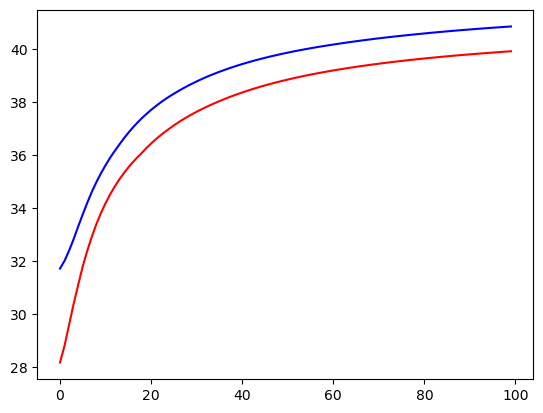

In [36]:
import matplotlib.pyplot as plt
plt.plot(tr,c="blue")
plt.plot(ts,c="red")

In [37]:
alphas[10]

500.01

# Gridsearch CV

In [38]:
tuning_grid = {"alpha":alphas}
rr = Ridge()
from sklearn.model_selection import GridSearchCV
cv1 = GridSearchCV(rr,tuning_grid,scoring="neg_mean_squared_error",cv=7)
cvmodel = cv1.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 50.01}

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
rr = Ridge(alpha=50)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(32.01323344579916, 28.814360088881582)

In [40]:
X1b = pd.get_dummies(Xb[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X2b = pd.DataFrame(ss.fit_transform(Xb[con]),columns=con)
Xnewb = X2b.join(X1b)

In [41]:
model=rr.fit(Xnew,Y)

In [42]:
ts_pred=model.predict(Xnewb)

In [43]:
B["Loan_new_Amount"]=model.predict(Xnewb)

In [44]:
B

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_new_Amount
0,7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N,126.593159
1,13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.0,Semiurban,N,224.480694
2,35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N,104.328912
3,55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N,96.654600
4,58,LP001323,Female,Yes,2,Graduate,No,2779,3664,176.0,360.0,0.0,Semiurban,N,153.876082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,317,LP002774,Male,Yes,0,Not Graduate,No,1700,2900,67.0,360.0,0.0,Urban,N,127.213748
58,325,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.0,Semiurban,N,108.176517
59,339,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,0.0,Rural,N,143.563609
60,346,LP002879,Male,Yes,0,Graduate,No,3391,1966,133.0,360.0,0.0,Rural,N,139.129141
